## 20. Directed Graphs

### 20.1 Introduction

Directed graphs are similar to undirected graphs, but there are arrows between vertices instead of edges.  Like undirected graphs, directed graphs can be used to represent independence relations.  They can also be used as an alternative to counterfactuals to represent causal relationships.  Some people use the phrase **Bayesian network** to refer to a directed graph endowed with a probability distribution.  This is a poor choice of terminology.  Statistical inference for directed graphs can be performed using frequentist or Bayesian methods so it is misleading to call them Bayesian networks.

### 20.2 DAG's

A **directed graph** $\mathcal{G}$ consists of a set of vertices $V$ and an edge set $E$ of ordered pairs of variables.  If $(X, Y) \in E$ then there is an arrow pointing from $X$ to $Y$.

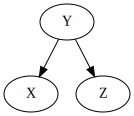

In [1]:
from graphviz import Digraph

d = Digraph()

d.edge('Y', 'X')
d.edge('Y', 'Z')

d

If an arrow connects two variables $X$ and $Y$ (in either direction) we say that $X$ and $Y$ are **adjacent**.  If there is an arrow from $X$ to $Y$ then $X$ is a **parent** of $Y$ and $Y$ is a **child** of $X$.  The set of all parents of $X$ is denoted by $\pi_X$ or $\pi(X)$.  A **directed path** from $X$ to $Y$ is a set of vertices beginning with $X$, ending with $Y$ such that each pair is connected by an arrow and all of the arrows point in the same direction:

$$ X \rightarrow \cdots \rightarrow Y
\quad \text{or} \quad
X \leftarrow \cdots \leftarrow Y $$

A sequence of adjacent vertices starting with $X$ and ending with $Y$ but ignoring the directions of the arrows is called an **undirected path**.  $X$ is an **ancestor** of $Y$ if there is a directed path from $X$ to $Y$.  We also say that $Y$ is a **descendant** of $X$.

A configuration of the form:

$$ X \rightarrow Y \leftarrow Z $$

is called a **collider**.  A configuration not of that form is called a **non-collider**, for example,

$$ X \rightarrow Y \rightarrow Z
\quad \text{or} \quad
X \leftarrow Y \leftarrow Z$$

A directed path that starts and ends at the same variable is called a **cycle**.  A directed graph is **acyclic** if it has no cycles.  In this case we say that the graph is a **directed acyclic graph** or **DAG**.  From now on, we will only deal with graphs that are DAG's.

### 20.3 Probability and DAG's

Let $\mathcal{G}$ be a DAG with vertices $V = (X_1, \dots, X_k)$.

If $\mathbb{P}$ is a distribution for $V$ with probability function $p$, we say that **$\mathbb{P}$ is Markov to $\mathcal{G}$** or that **$\mathcal{G} represents $\mathbb{P}$** if

$$ p(v) = \prod_{i=1}^k p(x_i | \pi_i) $$

where the $\pi_i$ are the parents of $X_i$.  The set of distributions represented by $\mathcal{G}$ is denoted by $M(\mathcal{G})$.

The following theorem says that $\mathbb{P} \in M(\mathcal{G})$ if and only if the following **Markov Condition** holds.  Roughly speaking, the Markov Condition says that every variable $W$ is independent of the "past" given its parents.

**Theorem 20.3**. A distribution $\mathbb{P} \in M(\mathcal{G})$ if and only if the following **Markov Condition** holds: for every variable $W$,

$$W \text{ ⫫ } \overline{W} | \pi_W $$

where $\overline{W}$ denotes all the other variables except parents and descendants of $W$.

### 20.4 More Independence Relations

The Markov Condition allows us to list some independence relations.  These relations may logically imply other independence relations.  Consider this DAG:

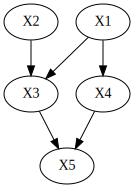

In [2]:
from graphviz import Digraph

d = Digraph()

d.edge('X2', 'X3')
d.edge('X1', 'X3')
d.edge('X1', 'X4')
d.edge('X3', 'X5')
d.edge('X4', 'X5')

d

The Markov Condition implies:

- $X_1 \text{ ⫫ } X_2$
- $X_2 \text{ ⫫ } \{ X_1, X_4 \}$
- $X_3 \text{ ⫫ } X_4 | \{ X_1, X_2 \}$
- $X_4 \text{ ⫫ } \{ X_2, X_3 \} | X_1$
- $X_5 \text{ ⫫ } \{ X_1, X_2 \} | \{X_3, X_4\}$

It turns out that these conditions imply:

$$ \{ X_4, X_5 \} \text{ ⫫ } X_2 | \{ X_1, X_3 \} $$

How do we find these extra independence relations?  The answer is **d-separation**, which can be summarized by 3 rules.

**The rules of d-separation**

1.  In a non-collider $(X, Y, Z)$, $X$ and $Z$ are **d-connected**, but they are **d-separated** given $Y$.
2.  If $X$ and $Z$ collide at $Y$ then $X$ and $Z$ are **d-separated** but they are **d-connected** given $Y$.
3.  Conditioning on the descendant of a collider has the same effect as conditioning on the collider.  Thus in the figure below, $X$ and $Z$ are **d-separated** but they are **d-connected** given $W$.

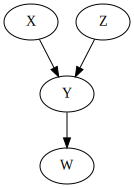

In [3]:
from graphviz import Digraph

d = Digraph()

d.edge('X', 'Y')
d.edge('Z', 'Y')
d.edge('Y', 'W')

d

Here is a more formal definition of d-separation.  Let $X$ and $Y$ be distinct vertices and let $W$ be a set of vertices not containing $X$ or $Y$.  Then $X$ and $Y$ are **d-separated given $W$** if there exists no undirected path $U$ between $X$ and $Y$ such that (i) every collider on $U$ has a descendant in $W$ and (ii) no other vertex on $U$ is in $W$.  If $U$, $V$, $W$ are distinct sets of vertices and $U$ and $V$ are not empty, then $U$ and $V$ are d-separated given $W$ if for every $X \in U$ and $Y \in V$, $X$ and $Y$ are d-separated given $W$.  Vertices that are not d-separated are said to be d-connected.

**Theorem 20.7 (Spirtes, Glymour and Scheines)**.  Let $A$, $B$ and $C$ be disjoint sets of vertices.  Then $A \text{ ⫫ } B | C$ if and only if $A$ and $B$ are d-separated by $C$.

Graphs that look different may imply the same independence relations.  If $\mathcal{G}$ is a DAG, we let $\mathcal{I}(\mathcal{G})$ denote all the independence statements implied by $\mathcal{G}$.  Two DAG's $\mathcal{G}_1$ and $\mathcal{G}_2$ for the same variables $V$ are **Markov equivalent** if $\mathcal{I}(\mathcal{G}_1) = \mathcal{I}(\mathcal{G}_2)$.  Given a DAG $\mathcal{G}$, let $\text{skeleton}(\mathcal{G})$ denote the undirected graph obtained by replacing the arrows with undirected edges.

**Theorem 20.9**.  Two DAG's $\mathcal{G}_1$ and $\mathcal{G}_2$ are Markov equivalent if and only if (i) $\text{skeleton}(\mathcal{G}_1) = \text{skeleton}(\mathcal{G}_2)$ and (ii) $\mathcal{G}_1$ and $\mathcal{G}_2$ have the same colliders.

### 20.5 Estimation for DAG's

Let $\mathcal{G}$ be a DAG.  Assume that all variables $V = \{ X_1, \dots, X_m \}$ are discrete.  The probability function can be written

$$ p(v) = \prod_{i=1}^m p(x_i | \pi_i) $$

To estimate $p(v)$ we need to estimate $p(x_i | \pi_i)$ for each $i$.  Think of the parents of $X_i$ as one discrete variable $\overline{X}_i$ with many levels.  For example, suppose that $X_3$ has parents $X_1$ and $X_2$, and that $X_1 \in \{ 0, 1, 2 \}$ while $X_2 \in \{ 0, 1 \}$.  We can regard the parents $X_1$ and $X_2$ as a single variable $\overline{X}_3$ defined by

$$ \overline{X}_3 = \begin{cases}
1 & \text{if } X_1 = 0, X_2 = 0\\
2 & \text{if } X_1 = 0, X_2 = 1\\
3 & \text{if } X_1 = 1, X_2 = 0\\
4 & \text{if } X_1 = 1, X_2 = 1\\
5 & \text{if } X_1 = 2, X_2 = 0\\
6 & \text{if } X_1 = 2, X_2 = 1\\
\end{cases}$$

Hence we can write

$$ p(v) = \prod_{i=1}^m p(x_i | \overline{x}_i) $$

**Theorem 20.11**.  Let $V_1, \dots, V_n$ be IID random vectors from distribution $p$ where

$$ p(v) = \prod_{i=1}^k p(x_i | \overline{x}_i) $$

The maximum likelihood estimator of $p$ is

$$ \hat{p}(v) = \prod_{i=1}^k \hat{p}(x_i | \overline{x}_i) $$

where

$$ \hat{p}(x_i | \overline{x}_i) = \frac{\# \{i : X_i = x_i \text{ and } \overline{X}_i = \overline{x}_i \}}{\# \{i : Y_i = y \}} $$

It is possible to extend these ideas to continuous random variables as well.  For example, we might use some parametric model $p(x | \pi_x; \theta_x)$ for each conditional density.  The likelihood function is then

$$ \mathcal{L}(\theta) = \prod_{i=1}^n p(V_i; \theta) = \prod_{i=1}^n \prod_{j=1}^m p(X_{ij} | \pi_j; \theta_j) $$

where $X_{ij}$ is the value of $X_j$ for the $i$-th data point and $\theta_j$ are the parameters for the $j$-th conditional density.  We can then proceed using maximum likelihood.

So far, we have assumed that the structure of the DAG is given.  One can also try to estimate the structure of the DAG itself from the data.  However, there are many possible DAG's so you would need much data for such a method to be reliable.  Producing a valid, accurate confidence set for the DAG structure would require astronomical sample sizes.  DAG's are thus most useful for encoding conditional independence information rather than discovering it.

### 20.6 Causation Revisited

We discussed causation in Chapter 19 using the idea of counterfactual random variables.  A different approach uses DAG's.  The two approaches are mathematically equivalent though they appear to be quite different.  The extra element in DAG is the idea of **intervention**.

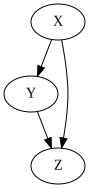

In [4]:
from graphviz import Digraph

d = Digraph()

d.edge('X', 'Y')
d.edge('Y', 'Z')
d.edge('X', 'Z')

d

Consider the DAG above.  The probability function for a distribution consistent with it has the form $p(x, y, z) = p(x)p(y | x)p(z| x, y)$.  Here is pseudo-code for generating from this distribution:

```
for i = 1, ..., n:
  x_i <- p_X(x_i)
  y_i <- p_{Y | X}(y_i | x_i)
  z_i <- p_{Z | X, Y}(z_i | x_i, y_i)
```

Suppose we repeat this code many times yielding data $(x_1, y_1, z_1), \dots, (x_n, y_n, z_n)$.  Among all the times that we observe $Y = y$, how often is $Z = z$?  The answer to this question is given by the conditional distribution of $Z | Y$.

$$
\begin{align}
\mathbb{P}(Z = z | Y = y) &= \frac{\mathbb{P}(Y = y, Z = z)}{\mathbb{P}(Y = y)} = \frac{p(y, z)}{p(y)} \\
&= \frac{\sum_x p(x, y, z)}{p(y)} = \frac{\sum_x p(x) p(y | x) p(z | x, y)}{p(y)} \\
&= \sum_x p(z | x, y) \frac{p(y | x) p(x)}{p(y)} = \sum_x p(z | x, y) \frac{p(x, y)}{p(y)} \\
&= \sum_x p(z | x, y) p(x | y)
\end{align}
$$

Now suppose we **intervene** by changing the computer code.  Specifically, suppose we fix $Y$ at the value $y$.  The code now looks like this:

```
set Y = y
for i = 1, ..., n:
  x_i <- p_X(x_i)
  z_i <- p_{Z | X, Y}(z_i | x_i, y)
```

Having **set** $Y = y$, how often was $Z = z$?  To answer, note that the intervention has changed the joint probability to be 

$$ p^*(x, z) = p(x) p(z | x, y) $$

The answer to our question is given by the marginal distribution

$$ p^*(z) = \sum_x p^*(x, z) = \sum_x p(x) p(z | x, y) $$

We shall denote this as $\mathbb{P}(Z = z | Y := y)$ or $p(z | Y := y)$.  We call $\mathbb{P}(Z = z | Y = y)$ **conditioning by observation** or **passive conditioning**.  We call $\mathbb{P}(Z = z | Y := y)$ **conditioning by intervention** or **active conditioning**.

- Passive conditioning is used to answer a predictive question like "Given that Joe smokes, what is the probability that he will get lung cancer?".
- Active conditioning is used to answer a predictive question like "If Joe quits smoking, what is the probability that he will get lung cancer?".

Consider a pair $(\mathcal{G}, \mathbb{P})$ where $\mathcal{G}$ is a DAG and $\mathbb{P}$ is a distribution for the variables $V$ of the DAG.  Let $p$ denote the probability function for $p$.  Consider intervening and fixing a variable $X$ to be equal to $x$.  We represent the intervention by doing two things:

1.  Create a new DAG $\mathcal{G}^*$ by removing all arrows pointing into $X$;
2.  Create a new distribution $\mathbb{P}^*$ with probability function $p^*(v) = \mathbb{P}(V = v | X := x)$ by removing the term $p(x | \pi_X)$ from $p(v)$.

The new pair $(\mathcal{G}^*, \mathbb{P}^*)$ represents the intervention "set $X = x$".

We can use DAG's to represent confounding variables.  If $X$ is a treatment and $Y$ is an outcome, a confounding variable $Z$ is a variable with arrows into both $X$ and $Y$.  It is easy to check, using the formalism of interventions, that the following facts are true.

- In a randomized study, the arrow between $Z$ and $X$ is broken.  In this case, even with $Z$ unobserved, the causal relationship between $X$ and $Y$ is estimable because it can be shown that $\mathbb{E}(Y | X := x) = \mathbb{E}(Y | X = x)$ which does not involved the unobserved $Z$.  
- In an observational study, with all confounders observed, we again get $\mathbb{E}(Y | X := x) = \int \mathbb{E}(Y | X = x, Z = z) d F_Z(z)$ as a formula for the expectation.  if $Z$ is unobserved then we cannot estimate the causal effect because this expectation involves the unobserved $Z$.  $\mathbb{P}(Y = y | X = x) \neq \mathbb{P}(Y = y | X := x)$ which is just another way of saying that causation is not association.

In fact, we can make a precise connection between DAG's and counterfactuals as follows.  Suppose that $X$ and $Y$ are binary.  Define the confounding variable $Z$ by

$$ Z = \begin{cases}
1 & \text{if } (C_0, C_1) = (0, 0) \\
2 & \text{if } (C_0, C_1) = (0, 1) \\
3 & \text{if } (C_0, C_1) = (1, 0) \\
4 & \text{if } (C_0, C_1) = (1, 1)
\end{cases}$$

From this approach, one can make the correspondence between the DAG and counterfactual approaches explicit.  This is left as an exercise for the reader.

### 20.8 Exercises

**Exercise 20.8.1**. Consider the three DAG's below without a collider.  Prove that $X \text{ ⫫ } Z | Y$.

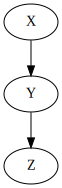

In [5]:
from graphviz import Digraph

a = Digraph()
a.edge('X', 'Y')
a.edge('Y', 'Z')

a

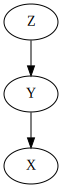

In [6]:
from graphviz import Digraph

b = Digraph()
b.edge('Y', 'X')
b.edge('Z', 'Y')

b

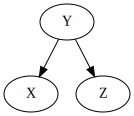

In [7]:
from graphviz import Digraph

c = Digraph()
c.edge('Y', 'X')
c.edge('Y', 'Z')

c

**Solution**.

Note that for all three graphs $X$ and $Z$ are d-separated by $Y$ -- the only undirected path $(X, Y, Z)$ has no colliders, and all its vertices other than $X$ and $Z$ (i.e. $\{ Y \}$) are listed in the d-separation condition.  Thus, conditions (i) and (ii) on the definition of d-separation holds.

Therefore, from Theorem 20.7, $X \text{ ⫫ } Z | Y$.

**Exercise 20.8.2**.  Consider the DAG below.  Prove that $X \text{ ⫫ } Z$ and that $X$ and $Y$ are dependent given $Y$. 

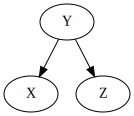

In [8]:
from graphviz import Digraph

d = Digraph()
d.edge('Y', 'X')
d.edge('Y', 'Z')

d

**Solution**.

Note that $X$ and $Z$ are d-connected by $Y$ -- the undirected path $(X, Y, Z)$ has one collider containing $Y$, so the definition of d-separation does not hold.  Therefore, from Theorem 20.7, $X$ and $Z$ are dependent given $Y$.

On the other hand, note that $X$ and $Z$ are d-separated given the empty set -- the only path from $X$ to $Z$ goes through $Y$, which is not in the empty set.  Thus, from Theorem 20.7, $X \text{ ⫫ } Z$.

**Exercise 20.8.3**.  Let $X \in \{0, 1\}$, $Y \in \{0, 1\}$, $Z \in \{ 0, 1, 2 \}$.  Suppose the distribution of $(X, Y, Z)$ is Markov to:

$$ X \longrightarrow Y \longrightarrow Z $$

Create a joint distribution $p(x, y, z)$ that is Markov to this DAG.  Generate 1000 random vectors from this distribution.  Estimate the distribution from the data using maximum likelihood.  Compare the estimated distribution to the true distribution.  Let $\theta = (\theta_{000}, \theta_{001}, \dots, \theta_{112})$ where $\theta_{rst} = \mathbb{P}(X = r, Y = s, Z = t)$.  Use the bootstrap to get the standard errors and 95% confidence interval for these 12 parameters.

**Solution**.  Let's create the following distributions:

$$ p_X(x) = \begin{cases}
1/2 & \text{if } x \in \{0, 1\} \\
0 & \text{otherwise}
\end{cases}
\quad
p_{Y | X}(y | x) = \begin{cases}
3/4 & \text{if } y = x \\
1/4 & \text{if } x + y = 1 \\
0 & \text{otherwise}
\end{cases}
\quad
p_{Z | Y}(z | y) = \begin{cases}
1/2 &\text{if } z = y \text{ and } z \in \{ 0, 1, 2 \}\\
1/4 &\text{if } z \neq y \text{ and } z \in \{ 0, 1, 2 \} \\
0 &\text{otherwise}
\end{cases}
$$

and a joint distribution

$$ p(x, y, z) = p_X(x) p_{Y | X}(y | x) p_{Z | Y}(z | y) $$

By construction, this distribution is Markov to the given DAG.

More explicitly, the joint probability distribution is:

$$
\begin{array}{ccc|c}
X & Y & Z & p \\
\hline
0 & 0 & 0 & .18750 \\
0 & 0 & 1 & .09375 \\
0 & 0 & 2 & .09375 \\
0 & 1 & 0 & .03125 \\
0 & 1 & 1 & .06250 \\
0 & 1 & 2 & .03125 \\
1 & 0 & 0 & .06250 \\
1 & 0 & 1 & .03125 \\
1 & 0 & 2 & .03125 \\
1 & 1 & 0 & .09375 \\
1 & 1 & 1 & .18750 \\
1 & 1 & 2 & .09375 \\
\end{array}
$$

The maximum likelihood estimator of $p$ is

$$ \hat{p}(v) = \prod_{i=1}^k \hat{p}(x_i | \overline{x}_i) $$

where

$$ \hat{p}(x_i | \overline{x}_i) = \frac{\# \{i : X_i = x_i \text{ and } \overline{X}_i = \overline{x}_i \}}{\# \{i : Y_i = y \}} $$

In [9]:
import numpy as np

def generate_samples(n):
    seeds = np.random.uniform(low=0, high=1, size=(n, 3))
    result = np.zeros((n, 3), dtype=int)
    result[:, 0] = seeds[:, 0] < 1/2
    result[:, 1] = np.where(seeds[:, 1] < 3/4, result[:, 0], 1 - result[:, 0])
    result[:, 2] = np.where(seeds[:, 2] < 1/2, result[:, 1], (result[:, 1] + np.where(seeds[:, 2] < 3/4, 1, 2)) % 3)
    return result

def estimate_parameters(X):
    n = X.shape[0]
    
    p_hat_x0 = np.sum(X[:, 0] == 0) / n
    p_hat_x1 = np.sum(X[:, 0] == 1) / n
    
    p_hat_y0_x0 = np.sum((X[:, 0] == 0) & (X[:, 1] == 0)) / np.sum(X[:, 0] == 0)
    p_hat_y1_x0 = np.sum((X[:, 0] == 0) & (X[:, 1] == 1)) / np.sum(X[:, 0] == 0)
    
    p_hat_y0_x1 = np.sum((X[:, 0] == 1) & (X[:, 1] == 0)) / np.sum(X[:, 0] == 1)
    p_hat_y1_x1 = np.sum((X[:, 0] == 1) & (X[:, 1] == 1)) / np.sum(X[:, 0] == 1)
    
    p_hat_z0_y0 = np.sum((X[:, 2] == 0) & (X[:, 1] == 0)) / np.sum(X[:, 1] == 0)
    p_hat_z1_y0 = np.sum((X[:, 2] == 1) & (X[:, 1] == 0)) / np.sum(X[:, 1] == 0)
    p_hat_z2_y0 = np.sum((X[:, 2] == 2) & (X[:, 1] == 0)) / np.sum(X[:, 1] == 0)

    p_hat_z0_y1 = np.sum((X[:, 2] == 0) & (X[:, 1] == 1)) / np.sum(X[:, 1] == 1)
    p_hat_z1_y1 = np.sum((X[:, 2] == 1) & (X[:, 1] == 1)) / np.sum(X[:, 1] == 1)
    p_hat_z2_y1 = np.sum((X[:, 2] == 2) & (X[:, 1] == 1)) / np.sum(X[:, 1] == 1)
    
    theta_hat = np.array([
        p_hat_x0 * p_hat_y0_x0 * p_hat_z0_y0,
        p_hat_x0 * p_hat_y0_x0 * p_hat_z1_y0,
        p_hat_x0 * p_hat_y0_x0 * p_hat_z2_y0,
        
        p_hat_x0 * p_hat_y1_x0 * p_hat_z0_y1,
        p_hat_x0 * p_hat_y1_x0 * p_hat_z1_y1,
        p_hat_x0 * p_hat_y1_x0 * p_hat_z2_y1,
        
        p_hat_x1 * p_hat_y0_x1 * p_hat_z0_y0,
        p_hat_x1 * p_hat_y0_x1 * p_hat_z1_y0,
        p_hat_x1 * p_hat_y0_x1 * p_hat_z2_y0,
        
        p_hat_x1 * p_hat_y1_x1 * p_hat_z0_y1,
        p_hat_x1 * p_hat_y1_x1 * p_hat_z1_y1,
        p_hat_x1 * p_hat_y1_x1 * p_hat_z2_y1
    ])
    
    return theta_hat

true_distribution = np.array([
    0.5 * 0.75 * 0.5,
    0.5 * 0.75 * 0.25,
    0.5 * 0.75 * 0.25,

    0.5 * 0.25 * 0.25,
    0.5 * 0.25 * 0.5,
    0.5 * 0.25 * 0.25,

    0.5 * 0.25 * 0.5,
    0.5 * 0.25 * 0.25,
    0.5 * 0.25 * 0.25,

    0.5 * 0.75 * 0.25,
    0.5 * 0.75 * 0.5,
    0.5 * 0.75 * 0.25
])

In [10]:
n = 1000
X = generate_samples(n)

In [11]:
theta_hat = estimate_parameters(X)

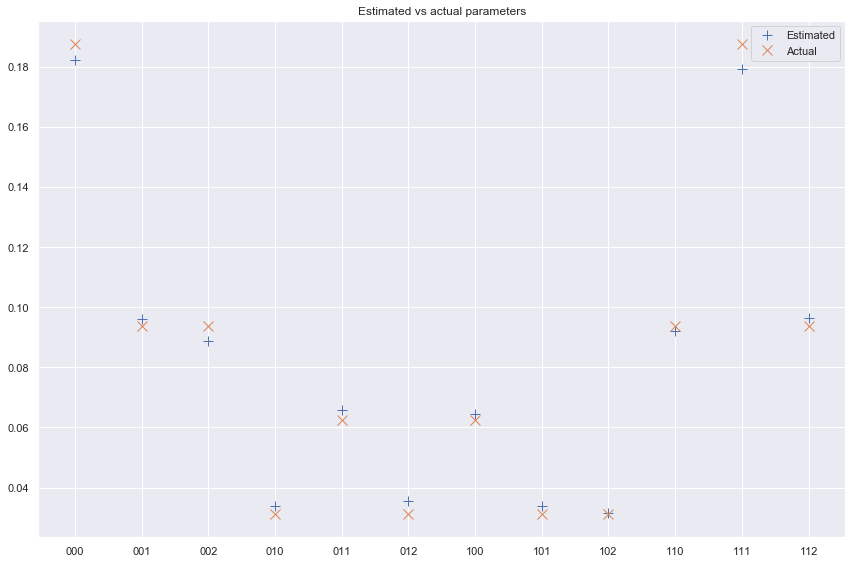

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

ind = np.arange(12)
labels = ['000', '001', '002', '010', '011', '012', '100', '101', '102', '110', '111', '112']

x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, theta_hat, label='Estimated', linestyle='', marker='+', ms=10)
ax.plot(x, true_distribution, label='Actual', linestyle='', marker='x', ms=10)

ax.set_title('Estimated vs actual parameters')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show();

In [13]:
# Bootstrapping:
from tqdm import tqdm_notebook

B = 10000
parameters_bootstrap = np.empty((B, 12))
for i in tqdm_notebook(range(B)):
    XX = generate_samples(n)
    parameters_bootstrap[i] = estimate_parameters(XX)
    
se_theta_hat = parameters_bootstrap.std(axis=0)
theta_p05 = np.quantile(parameters_bootstrap, 0.05, axis=0)
theta_p95 = np.quantile(parameters_bootstrap, 0.95, axis=0)

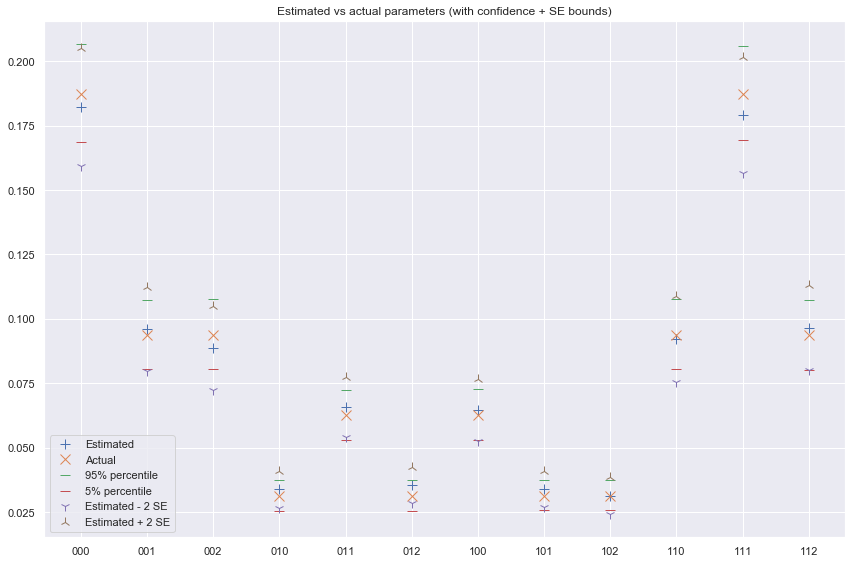

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

ind = np.arange(12)
labels = ['000', '001', '002', '010', '011', '012', '100', '101', '102', '110', '111', '112']

x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, theta_hat, label='Estimated', linestyle='', marker='+', ms=10)
ax.plot(x, true_distribution, label='Actual', linestyle='', marker='x', ms=10)
ax.plot(x, theta_p95, label='95% percentile', linestyle='', marker='_', ms=10)
ax.plot(x, theta_p05, label='5% percentile', linestyle='', marker='_', ms=10)
ax.plot(x, theta_hat - 2*se_theta_hat, label='Estimated - 2 SE', linestyle='', marker='1', ms=10)
ax.plot(x, theta_hat + 2*se_theta_hat, label='Estimated + 2 SE', linestyle='', marker='2', ms=10)

ax.set_title('Estimated vs actual parameters (with confidence + SE bounds)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show();

**Exercise 20.8.4**. Let $V = (X, Y, Z)$ have the joint distribution

$$
\begin{align}
X &\sim \text{Bernoulli}\left(\frac{1}{2}\right) \\
Y | X = x &\sim \text{Bernoulli}\left(\frac{e^{4x - 2}}{1 + e^{4x - 2}}\right) \\
Z | X = x, Y = y &\sim \text{Bernoulli}\left(\frac{e^{2(x+y)-2}}{1 + e^{2(x+y)-2}}\right)
\end{align}
$$

**(a)** Find an expression for $\mathbb{P}(Z = z | Y = y)$.  In particular, find $\mathbb{P}(Z = 1 | Y = 1)$.

**(b)** Write a program to simulate the model.  Conduct a simulation and compute $\mathbb{P}(Z = 1 | Y = 1)$ empirically.  Plot this as a function of the simulation size $N$.  It should converge to the theoretical value you computed in (a).

**(c)** Write down an expression for $\mathbb{P}(Z = 1 | Y := y)$.  In particular, find $\mathbb{P}(Z = 1 | Y := 1)$.

**(d)** Modify your program to simulate the intervention "set $Y = 1$".  Conduct a simulation and compute $\mathbb{P}(Z = 1 | Y := 1)$ empirically.  Plot this as a function of the simulation size $N$.  It should converge to the theoretical value you computed in (c).

**Solution**.

**(a)**

We have:

$$
\begin{align}
\mathbb{P}(Z = z | Y = y) &= \frac{\mathbb{P}(Y = y, Z = z)}{\mathbb{P}(Y = y)} = \frac{p(y, z)}{p(y)} \\
&= \frac{\sum_x p(x, y, z)}{p(y)} = \frac{\sum_x p(x) p(y | x) p(z | x, y)}{p(y)} \\
&= \sum_x p(z | x, y) \frac{p(y | x) p(x)}{p(y)} = \sum_x p(z | x, y) \frac{p(x, y)}{p(y)} \\
&= \sum_x p(z | x, y) p(x | y)
\end{align}
$$

Let $\alpha = \frac{e^{-2}}{1 + e^{-2}}$.  Note that $\frac{e^{-2}}{1 + e^{-2}} + \frac{e^{2}}{1 + e^{2}} = 1$, so $1 - \alpha = \frac{e^{2}}{1 + e^{2}}$.


Looking explicitly at each potential outcome for the joint distribution of $X$ and $Y$, we get:

$$
\begin{array}{c | cc | c}
p(x, y) & Y = 0 & Y = 1 & \\
\hline
X = 0 & (1 - \alpha) / 2 & \alpha / 2 & 1/2 \\
X = 1 & \alpha / 2 & (1 - \alpha) / 2 & 1/2 \\
\hline
      & 1/2 & 1/2 & 1
\end{array}
$$

Therefore,

$$ X | Y = 0 \sim \text{Bernoulli}\left( \alpha \right) 
\quad \text{and} \quad
X | Y = 1 \sim \text{Bernoulli}\left( 1 - \alpha \right) 
$$

or, more generally,

$$
X | Y = y \sim \text{Bernoulli}\left( \frac{e^{4y - 2}}{1 + e^{4y - 2}} \right) 
$$

Then, for $Z = 1$ and $y \in \{ 0, 1 \}$,

$$
\begin{align}
\mathbb{P}(Z = 1 | Y = y) &= \sum_x p(z = 1 | x, y) p(x | y) \\
&= p(z = 1 | x = 0, y) p(x = 0 | y) + p(z = 1 | x = 1, y) p(x = 1 | y) \\
&= \frac{e^{2y - 2}}{1 + e^{2y - 2}} \left( 1 - \frac{e^{4y - 2}}{1 + e^{4y - 2}} \right) + \frac{e^{4y - 2}}{1 + e^{4y - 2}} \frac{e^{4y - 2}}{1 + e^{4y - 2}}
\end{align}
$$

More explicitly,

$$ 
\begin{align}
\mathbb{P}(Z = 1 | Y = 0) &= \alpha (1 - \alpha) + \alpha^2 \\
&= \alpha  &\approx 0.1192 \\
\mathbb{P}(Z = 0 | Y = 0) &= 1 - \mathbb{P}(Z = 1 | Y = 0) \\
&= 1 - \alpha &\approx 0.8808\\
\mathbb{P}(Z = 1 | Y = 1) &= \frac{1}{2} \alpha + (1 - \alpha)^2 &\approx 0.8354\\
\mathbb{P}(Z = 0 | Y = 1) &= 1 - \mathbb{P}(Z = 1 | Y = 1) \\
&= 1 - \left(\frac{1}{2} \alpha + (1 - \alpha)^2 \right) &\approx 0.1646\\
\end{align}
$$

**(b)**

In [15]:
import numpy as np

def generate_samples(n):
    seeds = np.random.uniform(low=0, high=1, size=(n, 3))
    
    x = np.where(seeds[:, 0] < 1/2, 1, 0)
    y = np.where(seeds[:, 1] < np.exp(4*x - 2) / (1 + np.exp(4*x - 2)), 1, 0)
    z = np.where(seeds[:, 2] < np.exp(2*(x + y) - 2) / (1 + np.exp(2*(x + y) - 2)), 1, 0)
    
    result = np.zeros((n, 3), dtype=int)
    result[:, 0] = x
    result[:, 1] = y
    result[:, 2] = z
    
    return result

def estimate_z_given_y(X, z, y):
    # Just estimate 0.5 if there are no valid samples
    if np.sum((X[:, 1] == y)) == 0:
        return 0.5
    return np.sum((X[:, 1] == y) & (X[:, 2] == z)) / np.sum((X[:, 1] == y))

In [16]:
# Generate data
X = generate_samples(10**6)

In [17]:
# Estimate with various segments of the data
n_values = np.floor(np.logspace(0, 6, base=10)).astype(int)
z_estimates = [estimate_z_given_y(X[:k], 1, 1) for k in n_values]

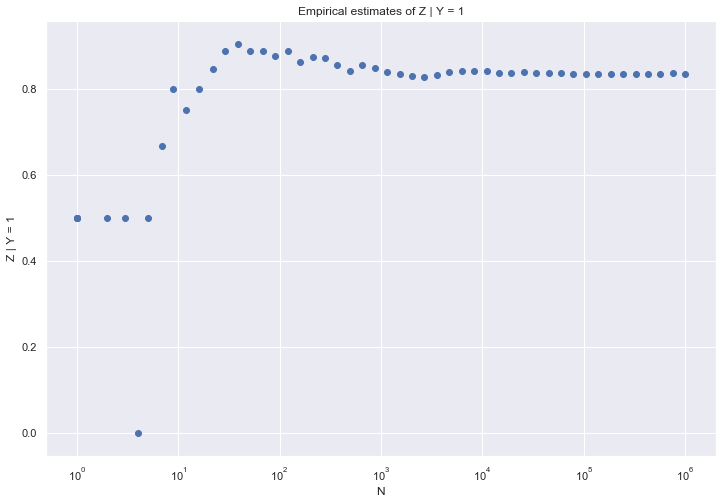

In [18]:
# Plot estimates

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))
plt.scatter(n_values, z_estimates)
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('Z | Y = 1')
plt.title('Empirical estimates of Z | Y = 1')
plt.show()

**(c)**

Fixing $Y := y \in \{0, 1\}$, we get:

$$ 
\begin{align}
\mathbb{P}(Z = 1 | Y := y) &= p^*(z = 1) = \sum_x p^*(x, z = 1) = \sum_x p(x) p(z = 1 | x, y) \\
&= \frac{1}{2} \frac{e^{2y-2}}{1 + e^{2y-2}} + \frac{1}{2} \frac{e^{2y}}{1 + e^{2y}}
\end{align}
$$

More explicitly,

$$ 
\begin{align}
\mathbb{P}(Z = 1 | Y := 0) &= \frac{1}{2} \alpha + \frac{1}{2}\frac{1}{2} \\
&= \frac{1}{4} + \frac{\alpha}{2} &\approx 0.3096 \\
\mathbb{P}(Z = 0 | Y := 0) &= 1 - \mathbb{P}(Z = 1 | Y := 0) \\
&= \frac{3}{4} - \frac{\alpha}{2} &\approx 0.6904 \\
\mathbb{P}(Z = 1 | Y := 1) &= \frac{1}{2} \frac{1}{2} + \frac{1}{2} \left( 1 - \alpha \right) \\
&= \frac{3}{4} - \frac{\alpha}{2} &\approx 0.6904 \\
\mathbb{P}(Z = 0 | Y := 1) &= 1 - \mathbb{P}(Z = 1 | Y := 1) \\
&= \frac{1}{4} + \frac{\alpha}{2} &\approx 0.3096
\end{align}
$$

**(d)**

In [19]:
import numpy as np

def generate_samples_modified(n, y0):
    seeds = np.random.uniform(low=0, high=1, size=(n, 3))
    
    x = np.where(seeds[:, 0] < 1/2, 1, 0)
    y = y0 * np.ones(n, dtype=int)
    z = np.where(seeds[:, 2] < np.exp(2*(x + y) - 2) / (1 + np.exp(2*(x + y) - 2)), 1, 0)
    
    result = np.zeros((n, 3), dtype=int)
    result[:, 0] = x
    result[:, 1] = y
    result[:, 2] = z
    
    return result

In [20]:
# Generate data
Xd = generate_samples_modified(n=10**6, y0=1)

In [21]:
# Estimate with various segments of the data
n_values = np.floor(np.logspace(0, 6, base=10)).astype(int)
zd_estimates = [estimate_z_given_y(Xd[:k], 1, 1) for k in n_values]

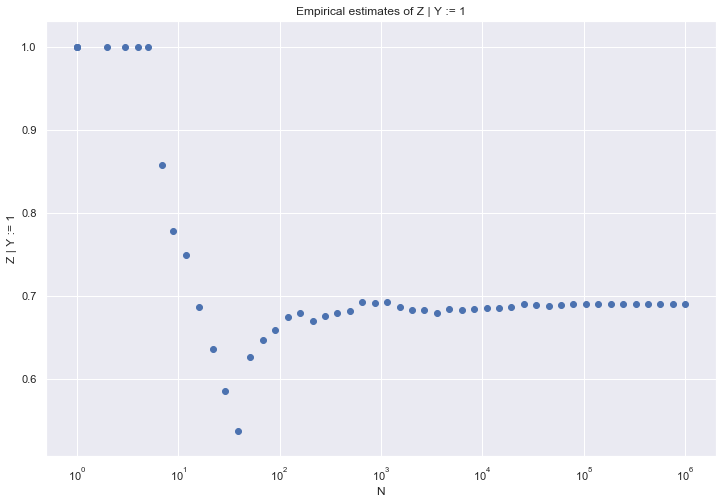

In [22]:
# Plot estimates

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))
plt.scatter(n_values, zd_estimates)
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('Z | Y := 1')
plt.title('Empirical estimates of Z | Y := 1')
plt.show()

**Exercise 20.8.5**.  This is a continuous, Gaussian version of the last question.  Let $V = (X, Y, Z)$ have the following joint distribution:

$$
\begin{align}
X &\sim \text{Normal}(0, 1) \\
Y | X = x &\sim \text{Normal}(\alpha x, 1) \\
Z | X = x, Y = y &\sim \text{Normal}(\beta y + \gamma x, 1)
\end{align}
$$

Here, $\alpha$, $\beta$ and $\gamma$ are fixed parameters.  Economists refer to models like this as *structural equation models*.

**(a)** Find an explicit expression for $f(z | y)$ and $\mathbb{E}(Z | Y = y) = \int z f(z | y) dz$.

**(b)** Find an explicit expression for $f(z | Y := y)$ and then find $\mathbb{E}(Z | Y := y) \equiv \int z f(z | Y := y) dy$.  Compare to (b).

**(c)** Find the joint distribution of $(Y, Z)$.  Find the correlation $\rho$ between $Y$ and $Z$.

**(d)** Suppose that $X$ is not observed and we try to make causal conclusions from the marginal distribution of $(Y, Z)$.  (Think of $X$ as unobserved confounding variables.)  In particular, suppose we declare that $Y$ causes $Z$ if $\rho \neq 0$ and we declare that $Y$ does not cause $Z$ if $\rho = 0$.  Show that this will lead to erroneous conclusions.

**(e)** Suppose we conduct a randomized experiment in which $Y$ is randomly assigned.  To be concrete, suppose that 

$$
\begin{align}
X &\sim \text{Normal}(0, 1) \\
Y | X = x &\sim \text{Normal}(\alpha, 1) \\
Z | X = x, Y = y &\sim \text{Normal}(\beta y + \gamma x, 1)
\end{align}
$$

Show that the method in (d) now yields correct conclusions i.e. $\rho = 0$ if and only if $f(z | Y := y)$ does not depend on $y$.

**Solution**.

**(a)**

The joint distribution of $X$ and $Y$ is:

$$ 
\begin{align}
f_{X, Y}(x, y) &= f_X(x) f_{Y | X}(y | x) \\
&= \left(\frac{1}{\sigma_X \sqrt{2\pi}} \exp \left\{-\frac{1}{2} \left(\frac{x - \mu_X}{\sigma_X}\right)^2 \right\} \right)
\left(\frac{1}{\sigma_{Y | X} \sqrt{2\pi}} \exp \left\{-\frac{1}{2} \left(\frac{y - \mu_{Y | X}}{\sigma_{Y | X}}\right)^2 \right\}\right) \\
&= \left(\frac{1}{\sqrt{2\pi}}\right)^2 \exp \left\{ -\frac{1}{2} \left( x^2 + (y - \alpha x)^2\right) \right\} \\
&= (2 \pi)^{-2 / 2} \text{det} (\Sigma_{X, Y})^{-1/2} \exp \left\{ -\frac{1}{2} (v - \mu_{X, Y})^T \Sigma_{X, Y}^{-1} (v - \mu_{X, Y})\right\}
\end{align}
$$

where

$$
v = \begin{bmatrix}x \\ y\end{bmatrix},
\quad \mu_{X, Y} = \begin{bmatrix}0 \\ 0\end{bmatrix}
\quad \text{and} \quad
\Sigma_{X, Y} = \begin{bmatrix}
1 & \alpha \\
\alpha & 1 + \alpha^2
\end{bmatrix}
$$

or, in words, the joint distribution of $X, Y$ is a multivariate normal with mean $\mu_{X, Y} = 0$ and variance $\Sigma_{X, Y}$.

$$ (X, Y) \sim \text{Normal}( 0, \Sigma_{X, Y}) $$

This can be obtained by inspection, by defining the inverse variance matrix

$$
\Sigma_{X, Y}^{-1} = \begin{bmatrix}
1 + \alpha^2 & -\alpha \\
-\alpha      & 1
\end{bmatrix}
$$

from expanding $x^2 + (y - \alpha x)^2$ and $(v - \mu_{X, Y})^T \Sigma_{X, Y}^{-1} (v - \mu_{X, Y})$, taking mean $\mu_{X, Y} = 0$ assuming the inverse matrix is symmetric, and equating the coefficients for the monomials $x^2, y^2, xy$.

The joint distribution of $X, Y, Z$ then is:

$$ 
\begin{align}
f_{X, Y, Z} (x, y, z) &= f_{X, Y}(x, y) f_{Z | X, Y}(z | x, y) \\
&= \left(\frac{1}{\sqrt{2\pi}}\right)^2 \exp \left\{ -\frac{1}{2} \left( x^2 + (y - \alpha x)^2\right) \right\} 
\left(\frac{1}{\sqrt{2\pi}} \right) \exp \left\{ -\frac{1}{2} (z - (\beta y + \gamma x))^2\right\} \\
&= \left(\frac{1}{\sqrt{2\pi}}\right)^3 \exp \left\{ -\frac{1}{2} \left( x^2 + (y - \alpha x)^2 + (z - (\beta y + \gamma x))^2\ \right) \right\} \\
&= (2\pi)^{-3/2} \text{det}(\Sigma_{X, Y, Z})^{-1/2} \exp \left\{ -\frac{1}{2} (v - \mu_{X, Y, Z})^T \Sigma_{X, Y, Z}^{-1} (v - \mu_{X, Y, Z})\right\}
\end{align}
$$

where

$$
v = \begin{bmatrix}x \\ y \\ z\end{bmatrix},
\quad \mu_{X, Y, Z} = \begin{bmatrix}0 \\ 0 \\ 0\end{bmatrix}
\quad \text{and} \quad
\Sigma_{X, Y, Z} = \begin{bmatrix}
1 & \alpha & \alpha \beta + \gamma\\
\alpha & 1 + \alpha^2 & \alpha(\alpha \beta + \gamma) + \beta \\
\alpha \beta + \gamma & \alpha(\alpha \beta + \gamma) + \beta & -(\alpha - \beta\gamma)^2 + (\beta^2 + 1)(\alpha^2 + \gamma^2 + 1)
\end{bmatrix}
$$

or, in words, the joint distribution of $X, Y, Z$ is a multivariate normal with mean $\mu_{X, Y, Z} = 0$ and variance $\Sigma_{X, Y, Z}$.

$$ (X, Y, Z) \sim \text{Normal}(0, \Sigma_{X, Y, Z}) $$

This can be obtained by inspection, by defining the inverse variance matrix

$$
\Sigma_{X, Y, Z}^{-1} = \begin{bmatrix}
1 + \alpha^2 + \gamma^2 & -\alpha + \beta \gamma & -\gamma \\
-\alpha + \beta \gamma  & 1 + \beta^2            & -\beta  \\
-\gamma                 & -\beta                 & 1
\end{bmatrix}
$$

from expanding $x^2 + (y - \alpha x)^2 + (z - (\beta y + \gamma x))^2$ and $(v - \mu_{X, Y, Z})^T \Sigma_{X, Y, Z}^{-1} (v - \mu_{X, Y, Z})$, taking mean $\mu_{X, Y, Z} = 0$, assuming the inverse matrix is symmetric, and equating the coefficients for the monomials $x^2, y^2, z^2, xy, xz, yz$.  A symbolic mathematics library was then used to calculate the inverse and simplify it as above.

Now that we have characterized the joint distribution of $X, Y, Z$, we can use theorem 15.5 to first compute the marginal distribution of $Y, Z$, and then use it again to compute the conditional distribution of $Z | Y = y$.

The marginal distribution of $Y, Z$ is

$$ (Y, Z) \sim \text{Normal}(0, \Sigma_{Y, Z})$$

where

$$ \Sigma_{Y, Z} = \begin{bmatrix}
1 + \alpha^2 & \alpha(\alpha \beta + \gamma) + \beta \\
\alpha(\alpha \beta + \gamma) + \beta & -(\alpha - \beta\gamma)^2 + (\beta^2 + 1)(\alpha^2 + \gamma^2 + 1)
\end{bmatrix} $$

Now, the conditional distribution of $Z | Y = y$ is:

$$ Z | Y = y \sim \text{Normal}(\mu_{Z | Y} (y), \Sigma_{Z | Y}(y)) $$

where

$$ \mu_{Z | Y}(y) = \mu_Z + \Sigma_{zy} \Sigma_{yy}^{-1} (y - \mu_y) = \frac{\alpha(\alpha \beta + \gamma) + \beta}{\alpha^2 + 1} y$$

$$ \Sigma_{Z | Y}(y) = \Sigma_{zz} - \Sigma_{zy} \Sigma_{yy}^{-1} \Sigma_{yz} = \frac{\alpha^2 + \gamma^2 + 1}{\alpha^2 + 1}$$

The explicit PDF is

$$ f_{Z | Y}(z | y) = \frac{1}{\sqrt{\Sigma_{Z | Y}(y)} \sqrt{2 \pi}} \exp \left\{ -\frac{1}{2} \frac{\left( z - \mu_{Z | Y}(y) \right)^2}{\Sigma_{Z | Y}(y)} \right\} $$

Finally, the expectation is the mean,

$$\mathbb{E}(Z | Y = y) = \mu_{Z | Y} (y) = \frac{\alpha(\alpha \beta + \gamma) + \beta}{\alpha^2 + 1} y$$

**(b)**  The joint distribution of $X, Z$ once we set $Y := y$ is:

$$ 
\begin{align}
f_{X, Z | Y := y}(x, z) &= f_X(x) f_{Z | X = x, Y := y}(z | x) \\
&= \left(\frac{1}{\sigma_X \sqrt{2\pi}} \exp \left\{-\frac{1}{2} \left(\frac{x - \mu_X}{\sigma_X}\right)^2 \right\} \right)
\left(\frac{1}{\sigma_{Z | X} \sqrt{2\pi}} \exp \left\{-\frac{1}{2} \left(\frac{z - \mu_{Z | X}}{\sigma_{Z | X}}\right)^2 \right\}\right) \\
&= \left( \frac{1}{\sqrt{2 \pi}} \right)^2 \exp \left\{ -\frac{1}{2} \left( x^2 + (z - (\beta y + \gamma x))^2\right) \right\} \\
&= \left( \frac{1}{\sqrt{2 \pi}} \right)^2 \exp \left\{ -\frac{1}{2} \left( x^2 + ((z - \beta y) - \gamma x))^2\right) \right\} \\
&= (2 \pi)^{-2 / 2} \text{det} (\Sigma_{X, Z})^{-1/2} \exp \left\{ -\frac{1}{2} (v - \mu_{X, Z})^T \Sigma_{X, Z}^{-1} (v - \mu_{X, Z})\right\}
\end{align}
$$

where

$$
v = \begin{bmatrix}x \\ z\end{bmatrix},
\quad \mu_{X, Z} = \begin{bmatrix}0 \\ \beta y\end{bmatrix}
\quad \text{and} \quad
\Sigma_{X, Z} = \begin{bmatrix}
1  & \gamma \\
\gamma & 1 + \gamma^2
\end{bmatrix}
$$

or, in words, the joint distribution of $X, Z$ is a multivariate normal with mean $\mu_{X, Z}$ and variance $\Sigma_{X, Z}$ (a result analogous to (a), but with a non-zero mean).

$$ (X, Z) \sim \text{Normal}(\mu_{X, Z}, \Sigma_{X, Z})$$

Therefore, from theorem 15.5, the marginal distribution of $Z$ is:

$$ Z | Y := y \sim \text{Normal}\left( \beta y, 1 + \gamma^2\right) $$

with a explicit PDF

$$ f(z | Y := y) = \frac{1}{\sqrt{1 + \gamma^2} \sqrt{2 \pi}} \exp \left\{ -\frac{1}{2} \frac{\left( z - \beta y \right)^2}{1 + \gamma^2} \right\}$$

and the expectation is the mean of the distribution,

$$ \mathbb{E}(Z | Y := y) = \beta y $$

Note that this is distinct from the result in (a) -- the relationship between $X$ and $Y$ is gone -- no $\alpha$ is present in the definition of this distribution, since setting $Y$ "breaks" the arrow from $X$ into $Y$.  Accordingly, the distribution is the same as in (a) when setting $\alpha = 0$, which also breaks that relation.

**(c)**  

We already found the joint distribution between $Y$ and $Z$ during part (a); it is

$$ (Y, Z) \sim \text{Normal}(0, \Sigma_{Y, Z}) $$

where

$$ \Sigma_{Y, Z} = \begin{bmatrix}
1 + \alpha^2 & \alpha(\alpha \beta + \gamma) + \beta \\
\alpha(\alpha \beta + \gamma) + \beta & -(\alpha - \beta\gamma)^2 + (\beta^2 + 1)(\alpha^2 + \gamma^2 + 1)
\end{bmatrix} $$

From the variance matrix, we can extract the correlation $\rho$,

$$ \rho = \frac{\text{Cov}(Y, Z)}{\sigma_Y \sigma_Z} = \frac{\alpha(\alpha \beta + \gamma) + \beta}{\sqrt{(1 + \alpha^2)(-(\alpha - \beta\gamma)^2 + (\beta^2 + 1)(\alpha^2 + \gamma^2 + 1))}}$$

**(d)**

Note that we can have $\beta = 0$ and $\rho \neq 0$.  In this situation, $Y$ and $Z$ are correlated but there is no causation between $Y$ and $Z$; we would still have $\mathbb{E}(Z | Y := y) = \beta y = 0$, so the conclusion would be erroneous.

**(e)**

In this new experiment, there is no relation between $X$ and $Y$ (given the empty set), as $Y$ is drawn from a distribution that does not depend on $X$.  $Z$ is then drawn from a distribution that depends on $X$ and $Y$.

Let's determine the joint distribution of $X, Y, Z$ in this scenario:

$$ 
\begin{align}
f_{X, Y, Z}(x, y, z) &= f_X(x) f_Y(y) f_{Z | X, Y}(z | x, y) \\
&= \left(\frac{1}{\sigma_X \sqrt{2\pi}} \exp \left\{-\frac{1}{2} \left(\frac{x - \mu_X}{\sigma_X}\right)^2 \right\} \right)
\left(\frac{1}{\sigma_Y \sqrt{2\pi}} \exp \left\{-\frac{1}{2} \left(\frac{y - \mu_Y}{\sigma_Y}\right)^2 \right\} \right)
\left(\frac{1}{\sigma_{Z | X, Y} \sqrt{2\pi}} \exp \left\{-\frac{1}{2} \left(\frac{z - \mu_{Z | X, Y}}{\sigma_{Z | X, Y}}\right)^2 \right\} \right) \\
&= (2 \pi)^{-3/2} \exp \left\{ -\frac{1}{2} \left(x^2 + (y - \alpha)^2 + (z - (\beta y + \gamma x))^2 \right)\right\} \\
&= (2 \pi)^{-3/2} \text{det} (\Sigma_{X, Y, Z})^{-1/2} \exp \left\{ -\frac{1}{2} (v - \mu_{X, Y, Z})^T \Sigma_{X, Y, Z}^{-1} (v - \mu_{X, Y, Z})\right\}
\end{align}
$$

where

$$
v = \begin{bmatrix}x \\ y \\ z\end{bmatrix},
\quad \mu_{X, Y, Z} = \begin{bmatrix}0 \\ \alpha \\ \alpha \beta \end{bmatrix}
\quad \text{and} \quad
\Sigma_{X, Y, Z} = \begin{bmatrix}
1 & 0 & \gamma \\
0 & 1 & \beta \\
\gamma & \beta & 1 + \beta^2 + \gamma^2
\end{bmatrix}
$$

which can be constructed by:
- getting the mean vector $\mu_{X, Y, Z}$ from the expectations of the distributions ($\mathbb{E}(X) = 0, \mathbb{E}(Y) = \alpha, \mathbb{E}(Z) = \mathbb{E}(\mathbb{E}(Z | X, Y)) = \alpha \beta$)
- constructing a symmetric inverse matrix $\Sigma_{X, Y, Z}^{-1}$, expanding $(v - \mu_{X, Y, Z})^T \Sigma_{X, Y, Z}^{-1} (v - \mu_{X, Y, Z})$, expanding $x^2 + (y - \alpha)^2 + (z - (\beta y + \gamma x))^2$ and equating the monomial coefficients;
- obtaining

$$ \Sigma_{X, Y, Z}^{-1} = \begin{bmatrix}
1 + \gamma^2 & \beta \gamma & -\gamma \\
\beta \gamma & 1 + \beta^2 & -\beta \\
-\gamma & -\beta & 1
\end{bmatrix} $$

and inverting it using a symbolic mathematics library.

We then have,

$$ (X, Y, Z) \sim \text{Normal}(\mu_{X, Y, Z}, \Sigma_{X, Y, Z}) $$

The correlation between $Y$ and $Z$ becomes

$$\rho = \frac{\text{Cov}(Y, Z)}{\sigma_Y \sigma_Z} = \frac{\beta}{\sqrt{1 + \beta^2 + \gamma^2}}$$

so the correlation is 0 if and only if $\beta = 0$.  

On the other hand, if we set $Y := y$, the joint distribution becomes equivalent to the one in (b), where

$$ Z | Y := y \sim \text{Normal}\left( \beta y, 1 + \gamma^2\right) $$

This does not depend in $y$ if and only if $\beta = 0$.

Therefore, for this concrete example, the method in (b) yields correct conclusions if and only if $\rho = 0$.